In [19]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd

file_path = './csv_recebidos/Distâncias_aeroportos.csv'  # Caminho do arquivo
file_path1 = './csv_recebidos/Nome_Aeroporto.csv'  # Caminho do arquivo
data = pd.read_csv(file_path)
data_nome = pd.read_csv(file_path1)

In [21]:
df_a = pd.DataFrame(data_nome)
df = pd.DataFrame(data)
df_a.columns

Index(['Aeroportos de origem '], dtype='object')

In [22]:
mapa_ids = {i+1: nome for i, nome in enumerate(df_a['Aeroportos de origem '])}
df['InputID'] = df['InputID'].replace(mapa_ids)
df['TargetID'] = df['TargetID'].replace(mapa_ids)
#Incluir equação de cálculo de CO2 futuramente
df['Emissão de CO2'] = df['Distância km'] * 0.123
df

,InputID,TargetID,Distância km,Emissão de CO2
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Guararapes - Gilberto ...,2095,257.685
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Deputado Luís Eduardo ...,1448,178.104
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Governador Aluízio Alves,2294,282.162
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Marechal Cunha Machado,2318,285.114
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional Pinto Martins,2337,287.451
...,...,...,...,...
4417,Aeroporto de Vágar,Aeroporto de Bratislava,1715,210.945
4418,Aeroporto de Vágar,Aeroporto de Ljubljana Jože Pučnik,2951,362.973
4419,Aeroporto de Vágar,Aeroporto Adolfo Suárez Madrid-Barajas,2632,323.736
4420,Aeroporto de Vágar,Aeroporto de Barcelona-El Prat,103,12.669


In [23]:
aeroportos_interesse = [
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional Guararapes - Gilberto Freyre",
    "Aeroporto Internacional Deputado Luís Eduardo Magalhães",
    "Aeroporto Internacional Governador Aluízio Alves",
    "Aeroporto Internacional Marechal Cunha Machado",
    "Aeroporto Internacional Pinto Martins"
]

unique = df['InputID'].unique()

# Converter para uma lista (se necessário)
lista_origem = unique.tolist()

for i in aeroportos_interesse:
    lista_origem.remove(i)

lista_origem

['Aeroporto Internacional de Nursultan Nazarbayev',
 'Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto Internacional de Pyongyang Sunan',
 'Aeroporto Internacional de Incheon',
 'Aeroporto Internacional Ninoy Aquino',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto Internacional Indira Gandhi',
 'Aeroporto Internacional Soekarno-Hatta (Jacarta)',
 'Aeroporto Internacional Ngurah Rai (Bali)',
 'Aeroporto Internacional de Narita (Tóquio)',
 'Aeroporto Internacional de Haneda (Tóquio)',
 'Aeroporto Internacional de Kansai (Osaka)',
 'Aeroporto Internacional de Wattay (Vientiane)',
 'Aeroporto Internacional de Kuala Lumpur (Sepang)',
 'Aeroporto Internacional de Penang (Penang)',
 'Aeroporto Internacional de Malé',
 'Aeroporto Internacional de Changi',
 'Aeroporto Internacional de Suvarnabhumi',
 'Aeroporto Internacional Don Mueang',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Tan Son Nhat',
 'Aeroporto

In [24]:
result = []

for i in lista_origem:
    # Inicializando dados para cada origem
    sp = [None, None]
    pe = [None, None]
    ba = [None, None]
    rn = [None, None]
    ma = [None, None]
    ce = [None, None]
    
    for j in aeroportos_interesse:
        linha = df.loc[(df['InputID'] == i) & (df['TargetID'] == j)]
        
        if not linha.empty:  # Certificar que a linha existe no dataset
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            
            if j == "Aeroporto Internacional de Guarulhos":
                sp = [distancia, emissao]
            elif j == "Aeroporto Internacional Guararapes - Gilberto Freyre":
                pe = [distancia, emissao]
            elif j == "Aeroporto Internacional Deputado Luís Eduardo Magalhães":
                ba = [distancia, emissao]
            elif j == "Aeroporto Internacional Governador Aluízio Alves":
                rn = [distancia, emissao]
            elif j == "Aeroporto Internacional Marechal Cunha Machado":
                ma = [distancia, emissao]
            else:
                ce = [distancia, emissao]
    
    # Adiciona os dados para a origem atual no resultado
    result.append({
        "Origem": i,
        "São Paulo - Guarulhos (Km)": sp[0],
        "São Paulo - Guarulhos (Kg)": sp[1],
        "Recife - Guararapes (Km)": pe[0],
        "Recife - Guararapes (Kg)": pe[1],
        "Salvador - Dpt. Magalhães (Km)": ba[0],
        "Salvador - Dpt. Magalhães (Kg)": ba[1],
        "Natal - Gov. Alves (Km)": rn[0],
        "Natal - Gov. Alves (Kg)": rn[1],
        "São Luiz - Mar. Cunha (Km)": ma[0],
        "São Luiz - Mar. Cunha (Kg)": ma[1],
        "Fortaleza - Martins (Km)": ce[0],
        "Fortaleza - Martins (Kg)": ce[1]
    })

df_result = pd.DataFrame(result)
df_result

,Origem,São Paulo - Guarulhos (Km),São Paulo - Guarulhos (Kg),Recife - Guararapes (Km),Recife - Guararapes (Kg),Salvador - Dpt. Magalhães (Km),Salvador - Dpt. Magalhães (Kg),Natal - Gov. Alves (Km),Natal - Gov. Alves (Kg),São Luiz - Mar. Cunha (Km),São Luiz - Mar. Cunha (Kg),Fortaleza - Martins (Km),Fortaleza - Martins (Kg)
0,Aeroporto Internacional de Nursultan Nazarbayev,13941,1714.743,11852,1457.796,12498,1537.254,11673,1435.779,12004,1476.492,11724,1442.052
1,Aeroporto Internacional de Xangai Pudong,18581,2285.463,16506,2030.238,17150,2109.450,16326,2008.098,16524,2032.452,16349,2010.927
2,Aeroporto Internacional de Pequim Capital,17578,2162.094,15483,1904.409,16130,1983.990,15285,1880.055,15429,1897.767,15276,1878.948
3,Aeroporto Internacional de Pyongyang Sunan,18106,2227.038,16057,1975.011,16696,2053.608,15838,1948.074,15821,1945.983,15769,1939.587
4,Aeroporto Internacional de Incheon,18312,2252.376,16257,1999.611,16898,2078.454,16040,1972.920,16028,1971.444,15975,1964.925
5,Aeroporto Internacional Ninoy Aquino,18378,2260.494,17316,2129.868,17795,2188.785,17262,2123.226,17934,2205.882,17490,2151.270
6,Aeroporto Internacional de Hong Kong,18018,2216.214,16343,2010.189,16913,2080.299,16242,1997.766,16805,2067.015,16414,2018.922
7,Aeroporto Internacional Indira Gandhi,14403,1771.569,12594,1549.062,13165,1619.295,12504,1537.992,13193,1622.739,12714,1563.822
8,Aeroporto Internacional Soekarno-Hatta (Jacarta),15633,1922.859,15486,1904.778,15621,1921.383,15602,1919.046,16657,2048.811,16013,1969.599
9,Aeroporto Internacional Ngurah Rai (Bali),15929,1959.267,16223,1995.429,16239,1997.397,16376,2014.248,17421,2142.783,16799,2066.277


In [25]:
# Ordenar o DataFrame pelo valor da coluna "São Paulo - Guarulhos (Km)"
df_result_sorted = df_result.sort_values(by="São Paulo - Guarulhos (Km)", ascending=True).reset_index(drop=True)

# Exibir o DataFrame ordenado
df_result_sorted

df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

#Adicionar coluna de frete

#Eventualmente o código vai ter outro cálculo de CO2

#Incluir CO2 extra

In [26]:
# DataFrame apenas com as distâncias e as origens
df_distancias = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Km)",
    "Recife - Guararapes (Km)",
    "Salvador - Dpt. Magalhães (Km)",
    "Natal - Gov. Alves (Km)",
    "São Luiz - Mar. Cunha (Km)",
    "Fortaleza - Martins (Km)"
])

# DataFrame apenas com as emissões e as origens
df_emissoes = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Kg)",
    "Recife - Guararapes (Kg)",
    "Salvador - Dpt. Magalhães (Kg)",
    "Natal - Gov. Alves (Kg)",
    "São Luiz - Mar. Cunha (Kg)",
    "Fortaleza - Martins (Kg)"
])

df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)


In [27]:
df.columns

Index(['InputID', 'TargetID', 'Distância km', 'Emissão de CO2'], dtype='object')

Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon']


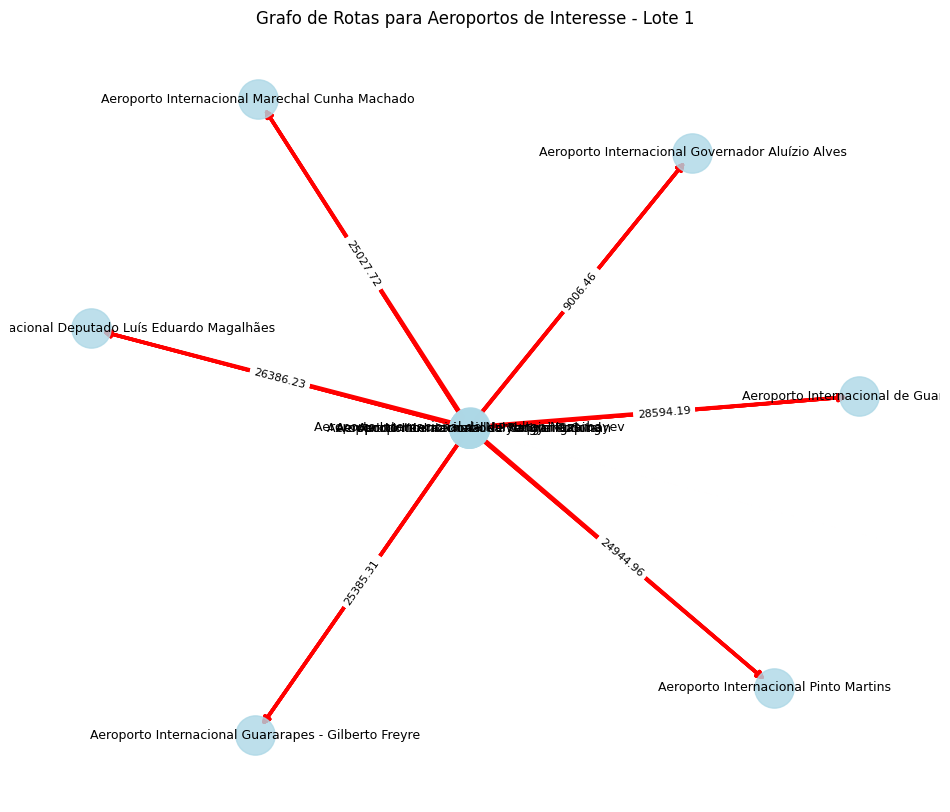

Processando aeroportos: ['Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong', 'Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)']


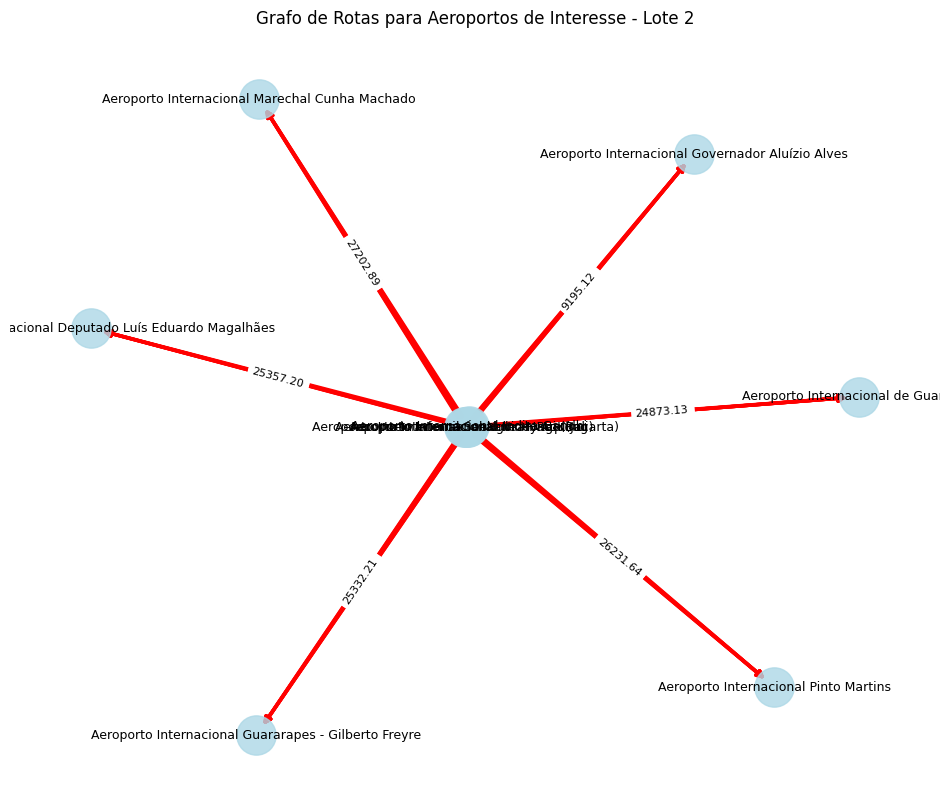

Processando aeroportos: ['Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)', 'Aeroporto Internacional de Kuala Lumpur (Sepang)']


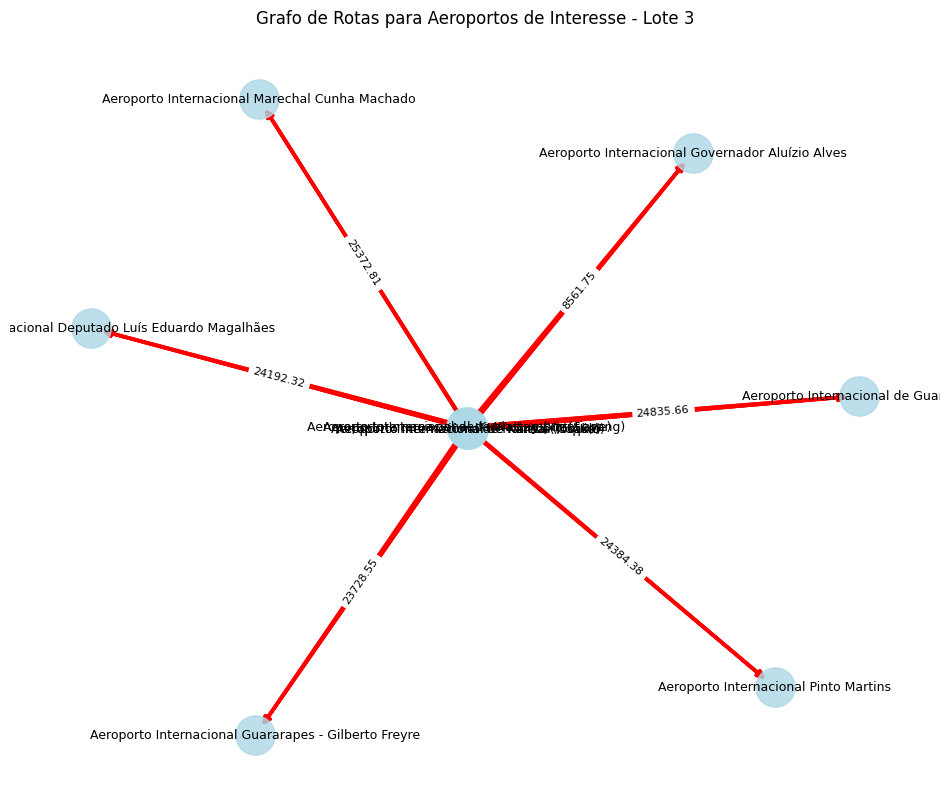

Processando aeroportos: ['Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang']


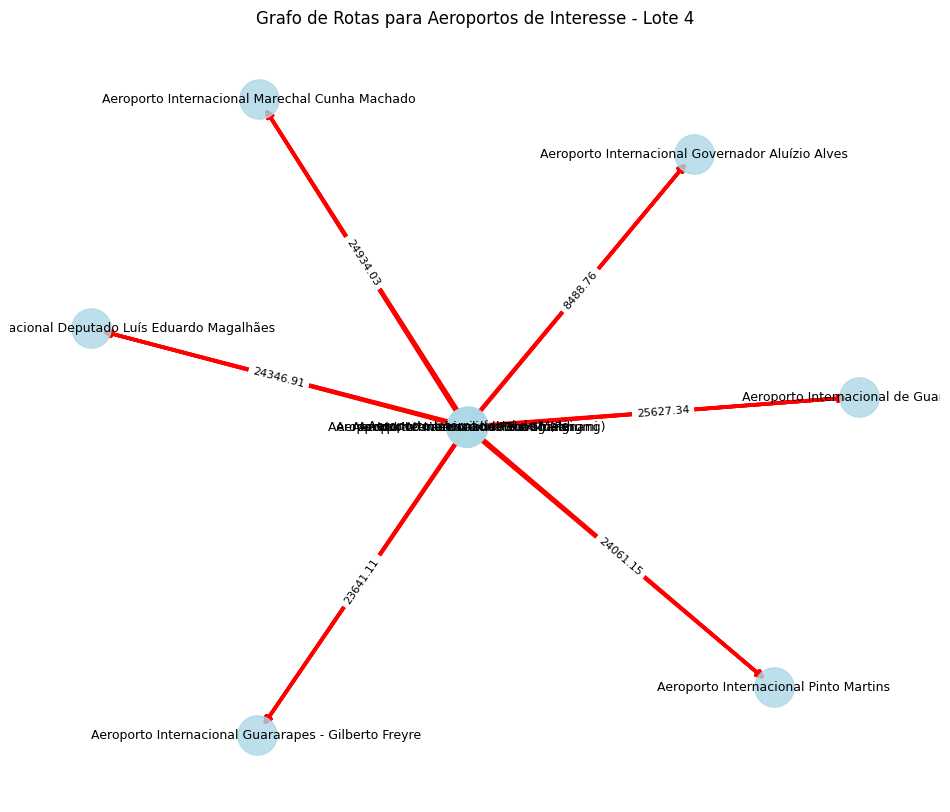

Processando aeroportos: ['Aeroporto Internacional de Taiwan Taoyuan', 'Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin']


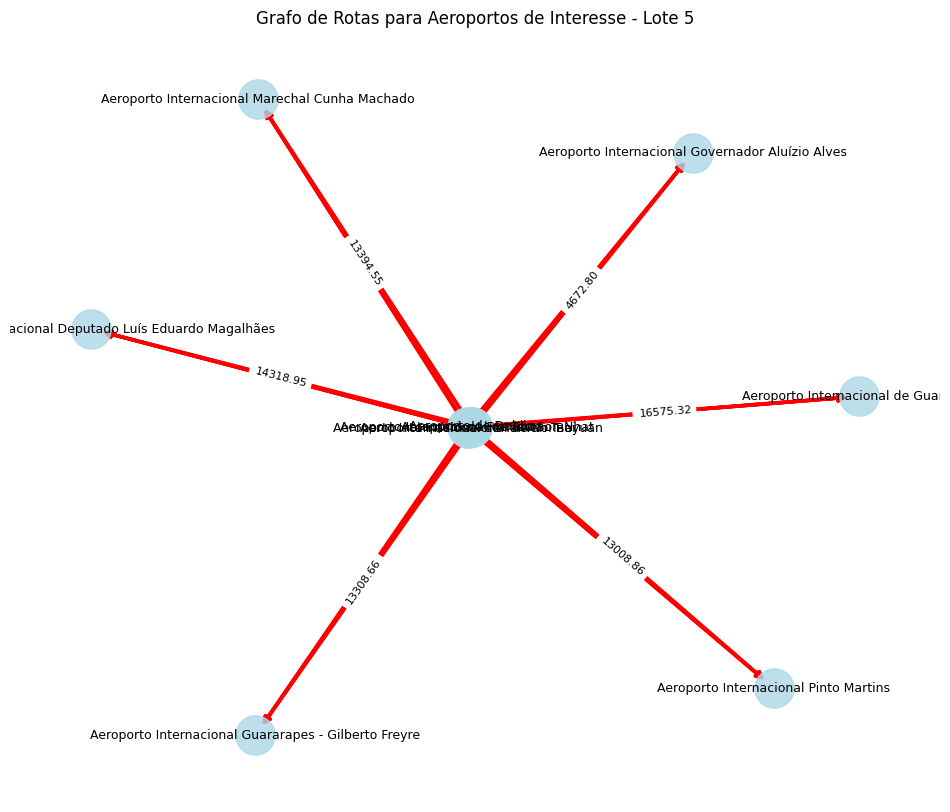

Processando aeroportos: ['Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino', 'Aeroporto de Milão-Malpensa', 'Aeroporto de Praga']


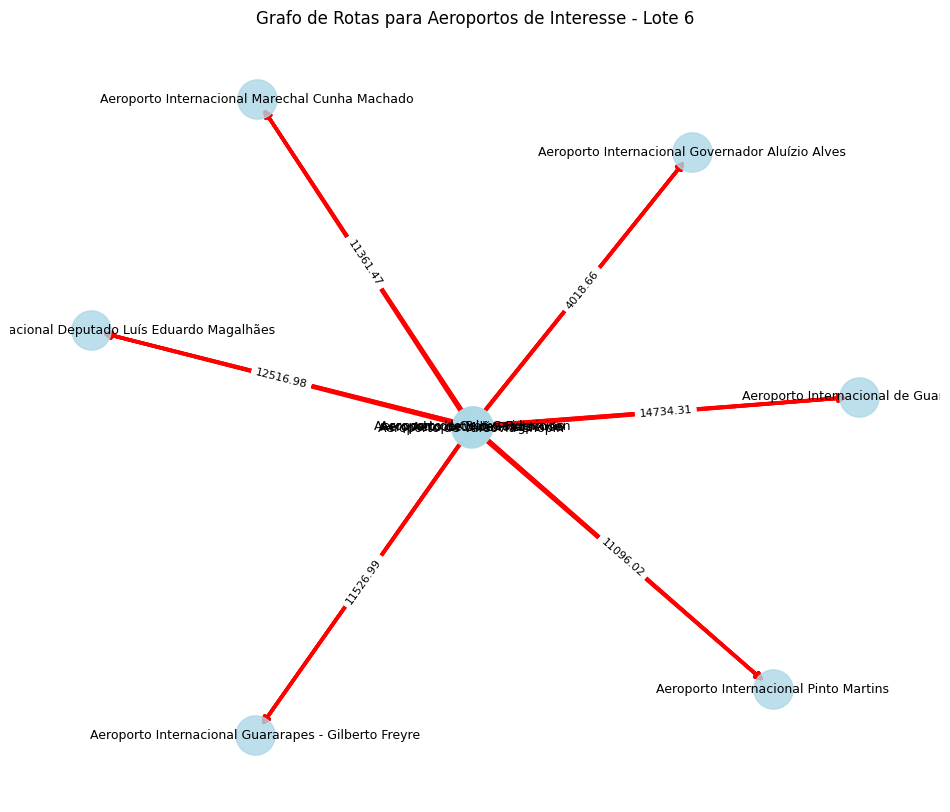

Processando aeroportos: ['Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)']


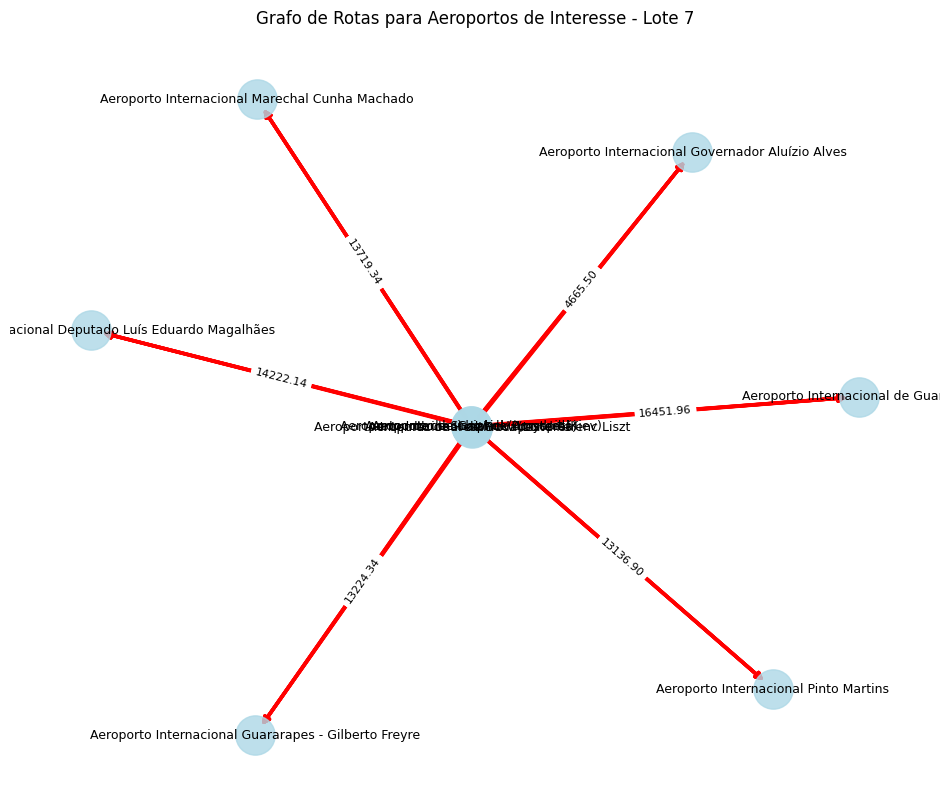

Processando aeroportos: ['Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)']


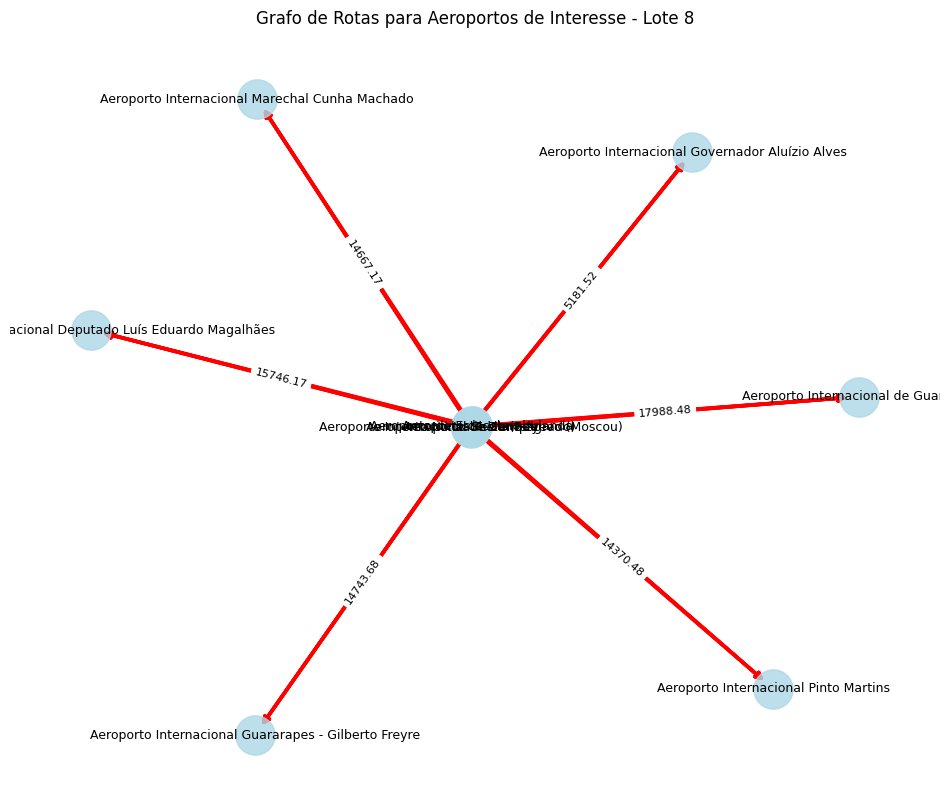

Processando aeroportos: ['Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coandă (Bucareste)', 'Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta']


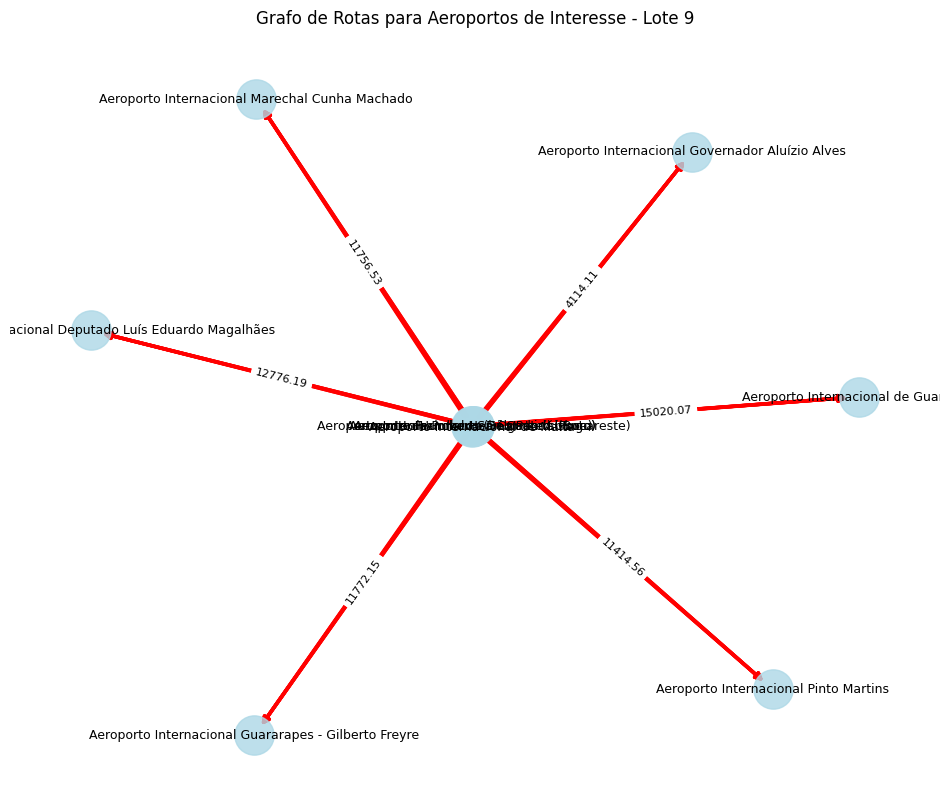

Processando aeroportos: ['Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)', 'Aeroporto de Barcelona-El Prat (Espanha)']


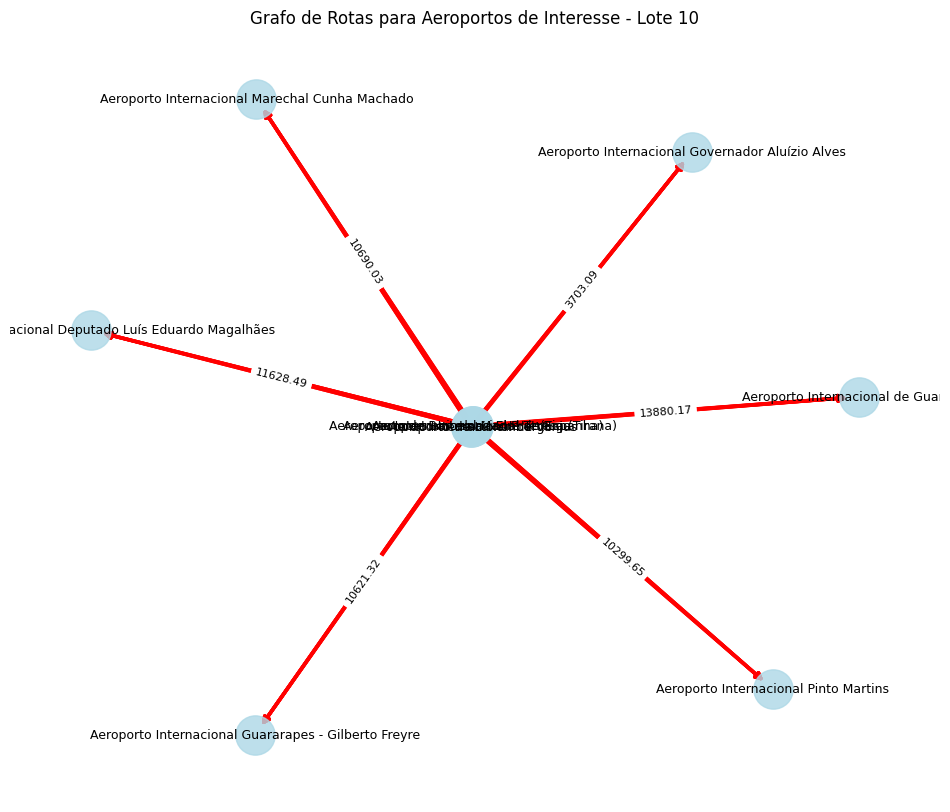

Processando aeroportos: ['Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava']


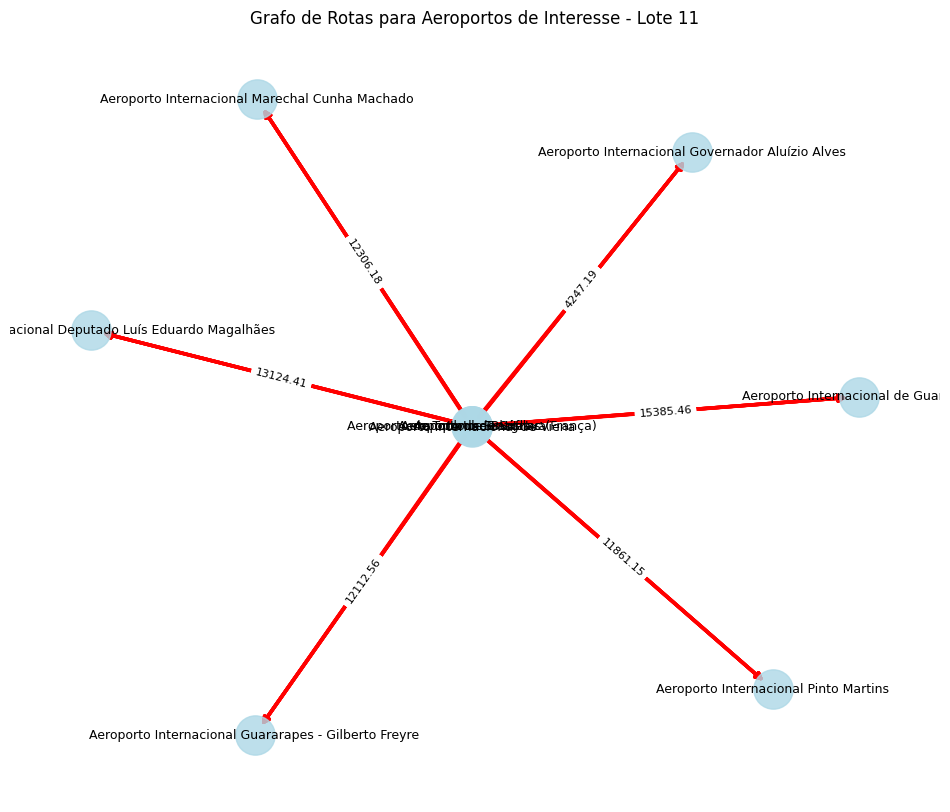

Processando aeroportos: ['Aeroporto de Ljubljana Jože Pučnik', 'Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


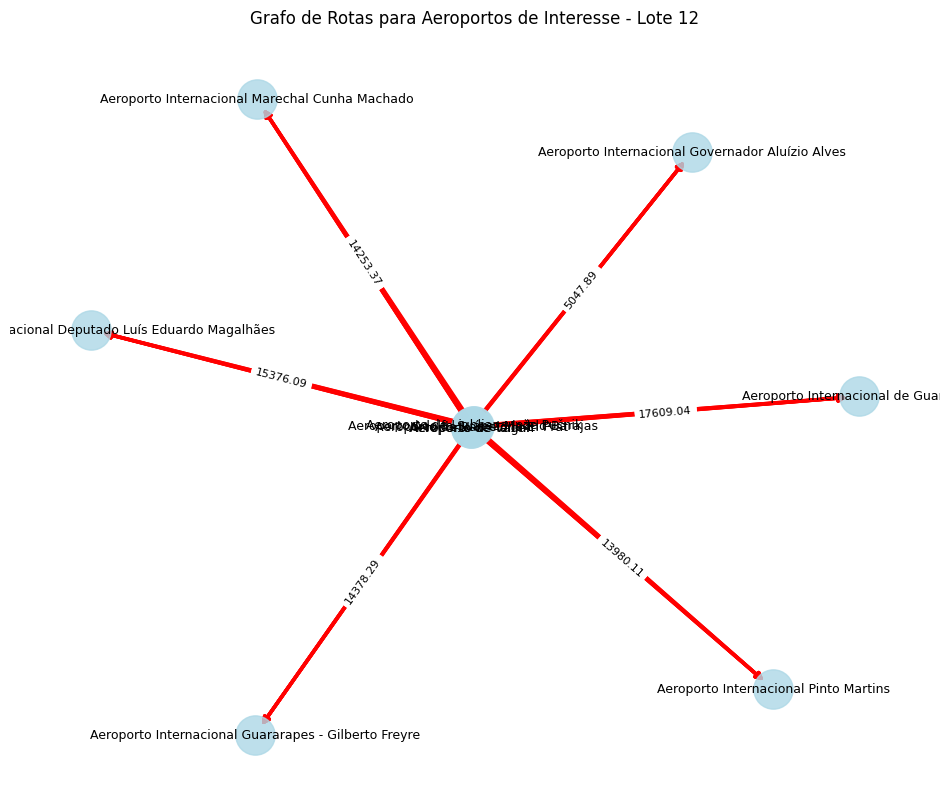

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Função para carregar dados do DataFrame e criar o grafo apenas para o lote atual
def load_graph_from_df(df, source_airports, interest_airports):
    # Filtrar o DataFrame para incluir apenas os aeroportos do lote atual e de interesse
    filtered_df = df[
        (df['InputID'].isin(source_airports)) & 
        (df['TargetID'].isin(interest_airports))
    ]

    # Criar grafo direcionado
    G = nx.DiGraph()

    # Adicionar arestas com pesos ao grafo
    for _, row in filtered_df.iterrows():
        source = row['InputID']
        target = row['TargetID']
        distance = row['Distância km']
        co2 = row['Emissão de CO2']

        # Peso ajustado para incluir múltiplos critérios
        weight = distance * 0.5 + co2 * 0.5

        # Penalidade se o destino não for Natal
        if target != "Aeroporto Internacional Governador Aluízio Alves":
            weight += distance

        G.add_edge(source, target, weight=weight, distance=distance, co2=co2)

    return G

def highlight_routes_to_natal_with_intermediate(G, source_airports, natal_airport, interest_airports):
    interest_path_edges = []

    for source in source_airports:
        if nx.has_path(G, source, natal_airport):
            # Calcular o menor caminho até Natal
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            
            # Verificar se há um aeroporto de interesse no caminho
            intermediate_airports = [node for node in path[1:-1] if node in interest_airports]

            # Dividir o caminho em segmentos se houver intermediários
            if intermediate_airports:
                for i, intermediate in enumerate(intermediate_airports):
                    # Origem até o intermediário
                    if i == 0:
                        first_segment = nx.shortest_path(G, source=source, target=intermediate, weight='weight')
                        interest_path_edges.extend(list(zip(first_segment[:-1], first_segment[1:])))
                    
                    # Intermediário até Natal
                    last_segment = nx.shortest_path(G, source=intermediate, target=natal_airport, weight='weight')
                    interest_path_edges.extend(list(zip(last_segment[:-1], last_segment[1:])))
            else:
                # Caso não haja intermediários, usar o caminho direto
                interest_path_edges.extend(list(zip(path[:-1], path[1:])))
        else:
            print(f"Sem caminho entre {source} e {natal_airport}.")

    return interest_path_edges


# Função para calcular e destacar as rotas otimizadas para os aeroportos de interesse
def highlight_routes_to_interest(G, source_airports, interest_airports):
    interest_path_edges = []

    for source in source_airports:
        for interest_airport in interest_airports:
            if nx.has_path(G, source, interest_airport):
                path = nx.shortest_path(G, source=source, target=interest_airport, weight='weight')
                path_edges = list(zip(path[:-1], path[1:]))
                interest_path_edges.extend(path_edges)

    return interest_path_edges

# Função para visualizar o grafo
def plot_clean_graph(G, interest_path_edges, title_suffix):
    pos = nx.spring_layout(G, seed=42)  # Layout consistente

    plt.figure(figsize=(12, 10))

    # Nós do grafo
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, alpha=0.8)

    # Arestas regulares com baixa opacidade
    regular_edges = [edge for edge in G.edges if edge not in interest_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)

    # Arestas destacadas para Natal
    nx.draw_networkx_edges(G, pos, edgelist=interest_path_edges, edge_color='red', width=2.5)

    # Rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=9, font_color='black')

    # Rótulos apenas para as arestas destacadas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight:.2f}" for edge, weight in edge_labels.items() if edge in interest_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)

    plt.title(f'Grafo de Rotas para Aeroportos de Interesse - {title_suffix}')
    plt.axis('off')
    plt.show()

# Processar os aeroportos em grupos de 5
batch_size = 5
for i in range(0, len(lista_origem), batch_size):
    # Selecionar subconjunto de 5 aeroportos da lista de origem
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")
    
    # Carregar o grafo apenas com dados do lote atual
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse)
    
    # Calcular rotas para aeroportos de interesse
    interest_path_edges = highlight_routes_to_interest(G, subset_origem, aeroportos_interesse)
    
    # Plotar o grafo com as rotas destacadas
    plot_clean_graph(G, interest_path_edges, title_suffix=f"Lote {i//batch_size + 1}")

In [30]:
print("Colunas do DataFrame:", df.columns)

Colunas do DataFrame: Index(['InputID', 'TargetID', 'Distância km', 'Emissão de CO2'], dtype='object')
